<a href="https://colab.research.google.com/github/Gkdas2k1/CognoRise-Infotech/blob/main/Home_Price_Prediction__Cognorise_Task2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [91]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
df = pd.read_csv('/content/data (2).csv')
df

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,3.130000e+05,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2.384000e+06,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,3.420000e+05,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,4.200000e+05,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,5.500000e+05,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,2014-07-09 00:00:00,3.081667e+05,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979,501 N 143rd St,Seattle,WA 98133,USA
4596,2014-07-09 00:00:00,5.343333e+05,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009,14855 SE 10th Pl,Bellevue,WA 98007,USA
4597,2014-07-09 00:00:00,4.169042e+05,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0,759 Ilwaco Pl NE,Renton,WA 98059,USA
4598,2014-07-10 00:00:00,2.034000e+05,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0,5148 S Creston St,Seattle,WA 98178,USA


In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

In [93]:
df.isna().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64

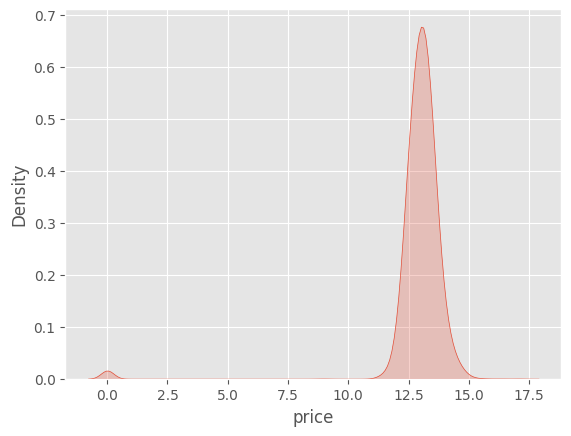

In [94]:
#check distribution of target colomn
sns.kdeplot(df['price'].apply(np.log1p),fill=True)
plt.show()

In [95]:
# z-score
from scipy import stats
from sklearn.feature_selection import mutual_info_regression
def make_mi_score(x,y):
    x = x.copy()
    for colname in x.select_dtypes(['object','category']):
        x[colname], _ = x[colname].factorize()

    discrete_features = [pd.api.types.is_integer_dtype(t) for t in x.dtypes]
    mi_score = mutual_info_regression(x, y, discrete_features=discrete_features, random_state=42)
    mi_score = pd.Series(mi_score, name='Mutual Information Score', index=x.columns)
    mi_score = mi_score.sort_values(ascending=False)
    return mi_score

In [96]:
x = df.drop('price',axis=1)
y = df['price']
mi_score(x,y)

street           1.187259
statezip         0.453802
city             0.315389
sqft_living      0.298434
sqft_above       0.200396
bathrooms        0.184815
sqft_lot         0.145104
bedrooms         0.080524
yr_built         0.075527
floors           0.053934
view             0.050866
sqft_basement    0.046252
yr_renovated     0.011067
waterfront       0.005997
date             0.005088
condition        0.001126
country          0.000000
dtype: float64

In [97]:
df.drop(['floors','view','sqft_basement','yr_renovated','waterfront','date','condition','country'],axis=1,inplace=True)
df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,sqft_above,yr_built,street,city,statezip
0,3.130000e+05,3.0,1.50,1340,7912,1340,1955,18810 Densmore Ave N,Shoreline,WA 98133
1,2.384000e+06,5.0,2.50,3650,9050,3370,1921,709 W Blaine St,Seattle,WA 98119
2,3.420000e+05,3.0,2.00,1930,11947,1930,1966,26206-26214 143rd Ave SE,Kent,WA 98042
3,4.200000e+05,3.0,2.25,2000,8030,1000,1963,857 170th Pl NE,Bellevue,WA 98008
4,5.500000e+05,4.0,2.50,1940,10500,1140,1976,9105 170th Ave NE,Redmond,WA 98052
...,...,...,...,...,...,...,...,...,...,...
4595,3.081667e+05,3.0,1.75,1510,6360,1510,1954,501 N 143rd St,Seattle,WA 98133
4596,5.343333e+05,3.0,2.50,1460,7573,1460,1983,14855 SE 10th Pl,Bellevue,WA 98007
4597,4.169042e+05,3.0,2.50,3010,7014,3010,2009,759 Ilwaco Pl NE,Renton,WA 98059
4598,2.034000e+05,4.0,2.00,2090,6630,1070,1974,5148 S Creston St,Seattle,WA 98178


In [98]:
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'sqft_above', 'yr_built', 'street', 'city', 'statezip'],
      dtype='object')

In [99]:
z = np.abs(stats.zscore(df[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'sqft_above', 'yr_built']]))
print(z)

      bedrooms  bathrooms  sqft_living  sqft_lot  sqft_above  yr_built
0     0.441122   0.843204     0.829971  0.193434    0.565224  0.531014
1     1.759705   0.432802     1.568528  0.161718    1.789559  1.674693
2     0.441122   0.205201     0.217367  0.080978    0.119171  0.161000
3     0.441122   0.113800     0.144686  0.190145    0.959621  0.261913
4     0.659291   0.432802     0.206984  0.121306    0.797222  0.175376
...        ...        ...          ...       ...         ...       ...
4595  0.441122   0.524202     0.653458  0.236689    0.368025  0.564651
4596  0.441122   0.432802     0.705374  0.202882    0.426025  0.410840
4597  0.441122   0.432802     0.904009  0.218462    1.371962  1.285418
4598  0.659291   0.205201     0.051238  0.229164    0.878421  0.108101
4599  0.441122   0.432802     0.674224  0.188139    0.391225  0.646303

[4600 rows x 6 columns]


In [100]:
threshold = 3
print(np.where(z > 3))

(array([  56,  107,  122,  122,  122,  122,  122,  217,  227,  233,  240,
        241,  252,  252,  252,  254,  272,  291,  291,  375,  418,  418,
        452,  461,  462,  462,  462,  462,  471,  479,  484,  495,  548,
        575,  581,  581,  634,  634,  634,  675,  679,  743,  747,  779,
        798,  839,  847,  878,  879,  999, 1017, 1031, 1078, 1089, 1103,
       1128, 1130, 1132, 1132, 1182, 1182, 1209, 1209, 1209, 1261, 1265,
       1272, 1275, 1275, 1301, 1302, 1302, 1360, 1390, 1406, 1408, 1411,
       1417, 1417, 1424, 1455, 1479, 1500, 1539, 1567, 1567, 1571, 1602,
       1637, 1644, 1722, 1762, 1786, 1944, 1952, 1952, 1962, 1962, 2005,
       2005, 2152, 2155, 2157, 2199, 2226, 2279, 2286, 2286, 2300, 2316,
       2328, 2328, 2328, 2365, 2401, 2480, 2551, 2588, 2654, 2654, 2654,
       2717, 2725, 2731, 2731, 2731, 2731, 2761, 2761, 2846, 2846, 2855,
       2872, 2889, 2917, 2967, 2967, 2967, 2968, 2980, 2980, 3004, 3004,
       3004, 3004, 3046, 3056, 3099, 3117, 3122, 3

In [101]:
df = df[(z < 3).all(axis=1)]
df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,sqft_above,yr_built,street,city,statezip
0,3.130000e+05,3.0,1.50,1340,7912,1340,1955,18810 Densmore Ave N,Shoreline,WA 98133
1,2.384000e+06,5.0,2.50,3650,9050,3370,1921,709 W Blaine St,Seattle,WA 98119
2,3.420000e+05,3.0,2.00,1930,11947,1930,1966,26206-26214 143rd Ave SE,Kent,WA 98042
3,4.200000e+05,3.0,2.25,2000,8030,1000,1963,857 170th Pl NE,Bellevue,WA 98008
4,5.500000e+05,4.0,2.50,1940,10500,1140,1976,9105 170th Ave NE,Redmond,WA 98052
...,...,...,...,...,...,...,...,...,...,...
4595,3.081667e+05,3.0,1.75,1510,6360,1510,1954,501 N 143rd St,Seattle,WA 98133
4596,5.343333e+05,3.0,2.50,1460,7573,1460,1983,14855 SE 10th Pl,Bellevue,WA 98007
4597,4.169042e+05,3.0,2.50,3010,7014,3010,2009,759 Ilwaco Pl NE,Renton,WA 98059
4598,2.034000e+05,4.0,2.00,2090,6630,1070,1974,5148 S Creston St,Seattle,WA 98178


In [102]:
!pip install category_encoders
from category_encoders import MEstimateEncoder

In [103]:
encoder = MEstimateEncoder()
df['street']= encoder.fit_transform(df['street'],df['price'])
df['city']= encoder.fit_transform(df['city'],df['price'])
df['statezip']= encoder.fit_transform(df['statezip'],df['price'])
df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,sqft_above,yr_built,street,city,statezip
0,3.130000e+05,3.0,1.50,1340,7912,1340,1955,4.224016e+05,421951.739973,376495.633393
1,2.384000e+06,5.0,2.50,3650,9050,3370,1921,1.457902e+06,570188.568854,846654.928587
2,3.420000e+05,3.0,2.00,1930,11947,1930,1966,4.369016e+05,439313.002696,322338.614812
3,4.200000e+05,3.0,2.25,2000,8030,1000,1963,4.759016e+05,794176.363775,604549.164777
4,5.500000e+05,4.0,2.50,1940,10500,1140,1976,5.409016e+05,641451.999607,636778.127599
...,...,...,...,...,...,...,...,...,...,...
4595,3.081667e+05,3.0,1.75,1510,6360,1510,1954,4.199850e+05,570188.568854,376495.633393
4596,5.343333e+05,3.0,2.50,1460,7573,1460,1983,5.330683e+05,794176.363775,627124.014671
4597,4.169042e+05,3.0,2.50,3010,7014,3010,2009,4.743537e+05,371307.215345,495885.719906
4598,2.034000e+05,4.0,2.00,2090,6630,1070,1974,3.676016e+05,570188.568854,269270.273110


In [104]:
x = df.drop('price',axis=1).values
y = df['price'].values
x

array([[3.00000000e+00, 1.50000000e+00, 1.34000000e+03, ...,
        4.22401619e+05, 4.21951740e+05, 3.76495633e+05],
       [5.00000000e+00, 2.50000000e+00, 3.65000000e+03, ...,
        1.45790162e+06, 5.70188569e+05, 8.46654929e+05],
       [3.00000000e+00, 2.00000000e+00, 1.93000000e+03, ...,
        4.36901619e+05, 4.39313003e+05, 3.22338615e+05],
       ...,
       [3.00000000e+00, 2.50000000e+00, 3.01000000e+03, ...,
        4.74353703e+05, 3.71307215e+05, 4.95885720e+05],
       [4.00000000e+00, 2.00000000e+00, 2.09000000e+03, ...,
        3.67601619e+05, 5.70188569e+05, 2.69270273e+05],
       [3.00000000e+00, 2.50000000e+00, 1.49000000e+03, ...,
        3.76201619e+05, 3.01584327e+05, 3.22338615e+05]])

In [105]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [106]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [107]:
lr.score(x_train,y_train)

0.9982353490891727

In [108]:
lr.score(x_test,y_test)

0.9991710083369107

In [110]:
x_train[0:3]

array([[3.00000000e+00, 3.25000000e+00, 1.47000000e+03, 1.23500000e+03,
        1.18000000e+03, 2.00800000e+03, 4.15901619e+05, 5.70188569e+05,
        3.33635537e+05],
       [3.00000000e+00, 1.50000000e+00, 1.82000000e+03, 5.75600000e+03,
        1.64000000e+03, 1.94600000e+03, 6.07651619e+05, 5.70188569e+05,
        8.46654929e+05],
       [3.00000000e+00, 2.00000000e+00, 2.46000000e+03, 4.13430000e+04,
        2.46000000e+03, 1.98800000e+03, 5.75901619e+05, 5.70201319e+05,
        5.53242160e+05]])

In [111]:
y_train[0:3]

array([300000., 683500., 620000.])

In [113]:
predict = lr.predict(x_train[0:3])
predict

array([304045.88576057, 682425.35574661, 619140.7897468 ])